In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [2]:
variable_customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
variable_customer_df.shape

(9134, 24)

In [3]:
variable_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
variable_customer_df.value_counts()

Customer  State       Customer Lifetime Value  Response  Coverage  Education             Effective To Date  EmploymentStatus  Gender  Income  Location Code  Marital Status  Monthly Premium Auto  Months Since Last Claim  Months Since Policy Inception  Number of Open Complaints  Number of Policies  Policy Type     Policy        Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size
AA10041   California  7901.744238              No        Basic     High School or Below  2/2/11             Unemployed        M       0       Suburban       Single          113                   35                       83                             0                          5                   Personal Auto   Personal L3   Offer1            Call Center    1258.327804         SUV            Medsize         1
RL28880   Nevada      7553.225007              No        Basic     Bachelor              2/12/11            Employed          F       69959   Suburban       Divorced        63  

In [5]:
variable_customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
variable_customer_df.isna().sum()/len(variable_customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

as we can see here there are no Nan values in the dataset.

here we are snake casing the column heads

In [7]:

def fe8 (x:str):
    x = x.replace(" ","_")
    x = x.replace("/", "_")
    return x.lower()

variable_customer_df.columns = list(map(fe8, variable_customer_df.columns))
variable_customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


changing the format of the date column

In [8]:
variable_customer_df['effective_to_date'] = pd.to_datetime(variable_customer_df['effective_to_date'], errors='coerce') 
variable_customer_df[['effective_to_date']]

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03
...,...
9129,2011-02-10
9130,2011-02-12
9131,2011-02-06
9132,2011-02-03


define a function that separate the discrete from the continuous

In [9]:
nums = variable_customer_df.select_dtypes(np.number)

def discrete_continuous(df):
    d_lst = []
    c_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.03):
            d_lst.append(col)
        else:
            c_lst.append(col)

    continuous_df = df[c_lst]
    discrete_df = df[d_lst]
    return continuous_df, discrete_df 

continuous_df, discrete_df = discrete_continuous(nums)

In [10]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [11]:
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [12]:

# continuous_df = variable_customer_df.select_dtypes(include = float)
# display(continuous_df)
# discrete_df = variable_customer_df.select_dtypes(include = int)
# discrete_df

,customer_lifetime_value,income,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.226451
income,0.024366,1.000000,-0.355254
total_claim_amount,0.226451,-0.355254,1.000000


<AxesSubplot:>

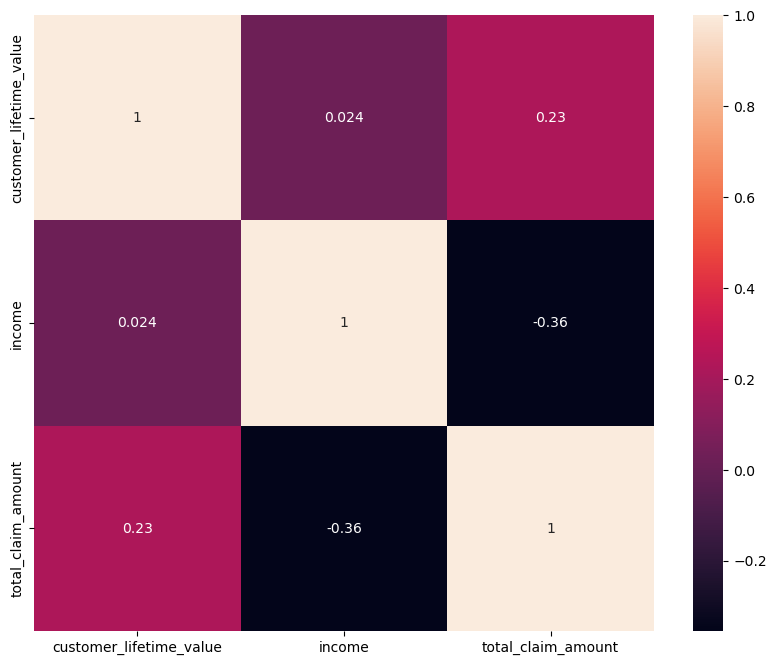

In [13]:
corr_matrix1 = continuous_df.corr()
display(corr_matrix1)

plt.figure(figsize = (10,8))
display(sns.heatmap(corr_matrix1, annot = True))

plt.show()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
monthly_premium_auto,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,-0.011233,0.009136,-0.013333,0.001498,1.000000


<AxesSubplot:>

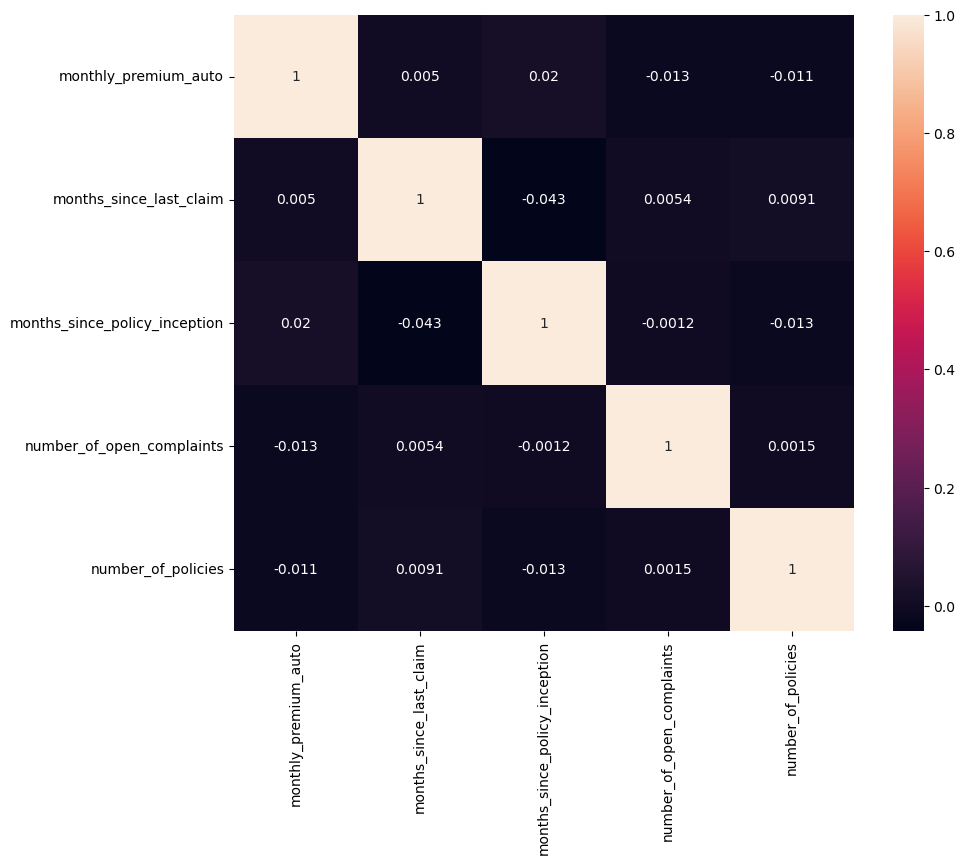

In [14]:
corr_matrix2 = discrete_df.corr()
display(corr_matrix2)

plt.figure(figsize = (10,8))
display(sns.heatmap(corr_matrix2, annot = True))
plt.show()

<AxesSubplot:>

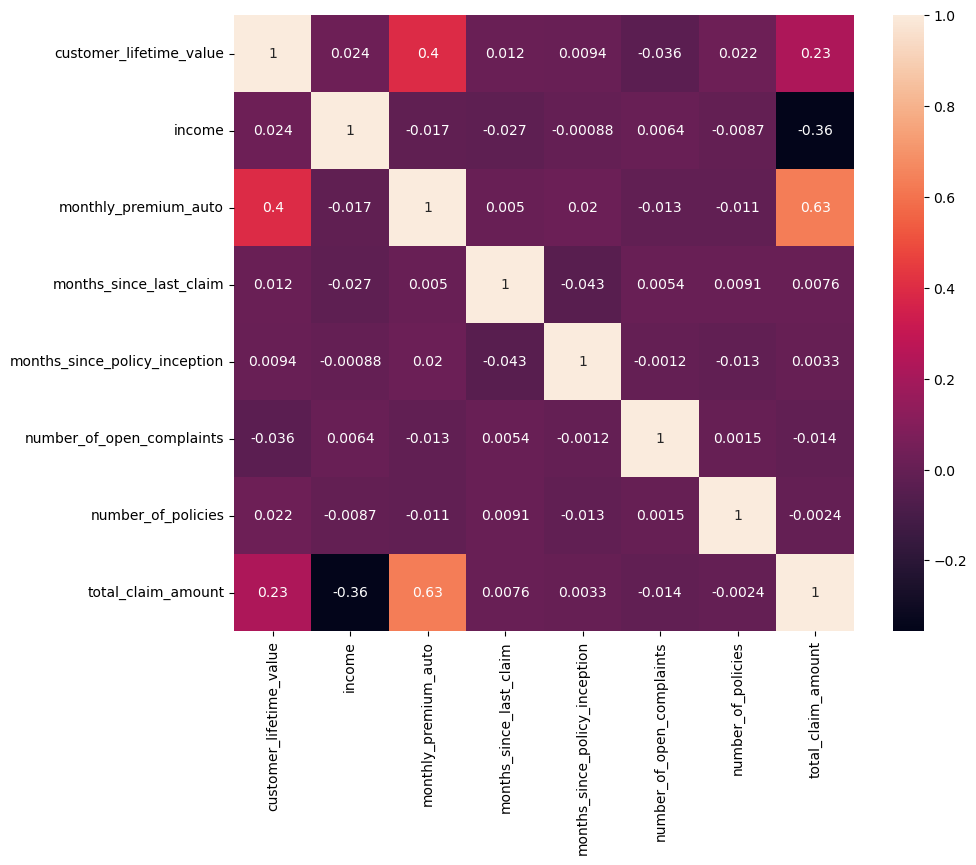

In [15]:
corr_matrix = nums.corr()
plt.figure(figsize = (10,8))
display(sns.heatmap(corr_matrix, annot = True))
plt.show()

assuming the target will still be the total amount claim, we can inferred from those heat maps , that thera re no clear colinearity from the numerical features to the target.

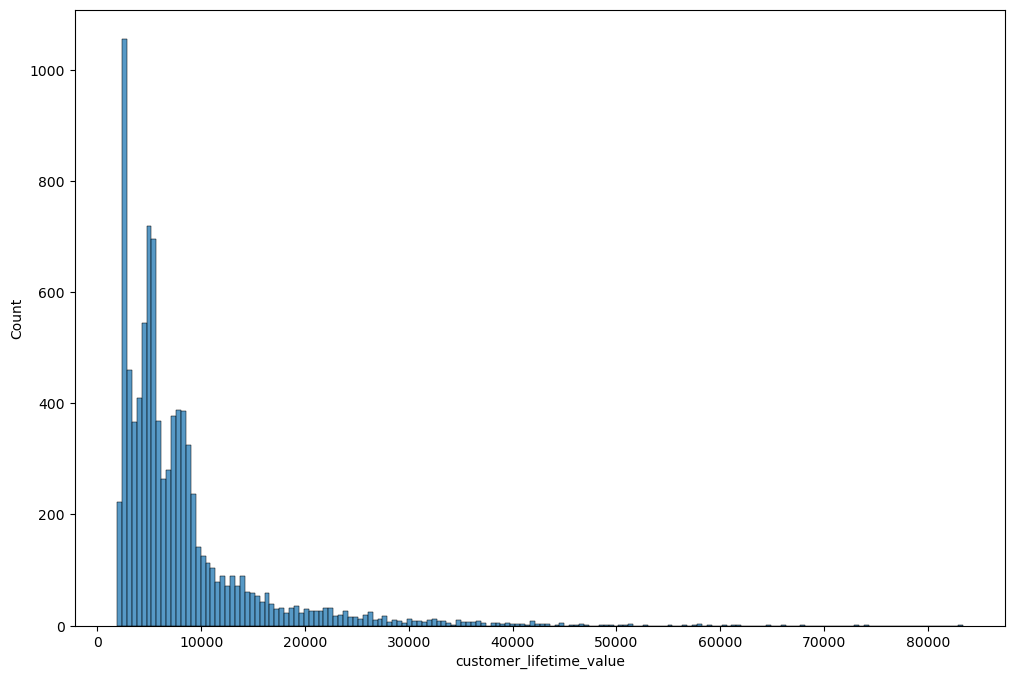

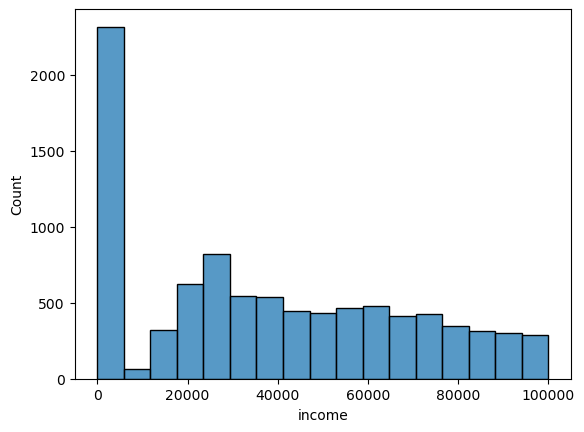

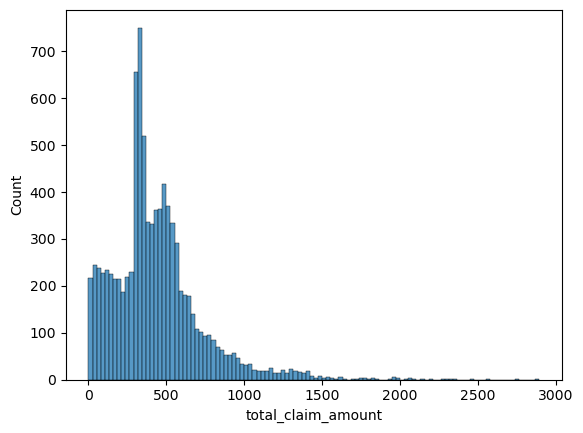

In [16]:
plt.figure(figsize = (12,8))
for column in continuous_df:
    sns.histplot(nums[column])
    plt.show()


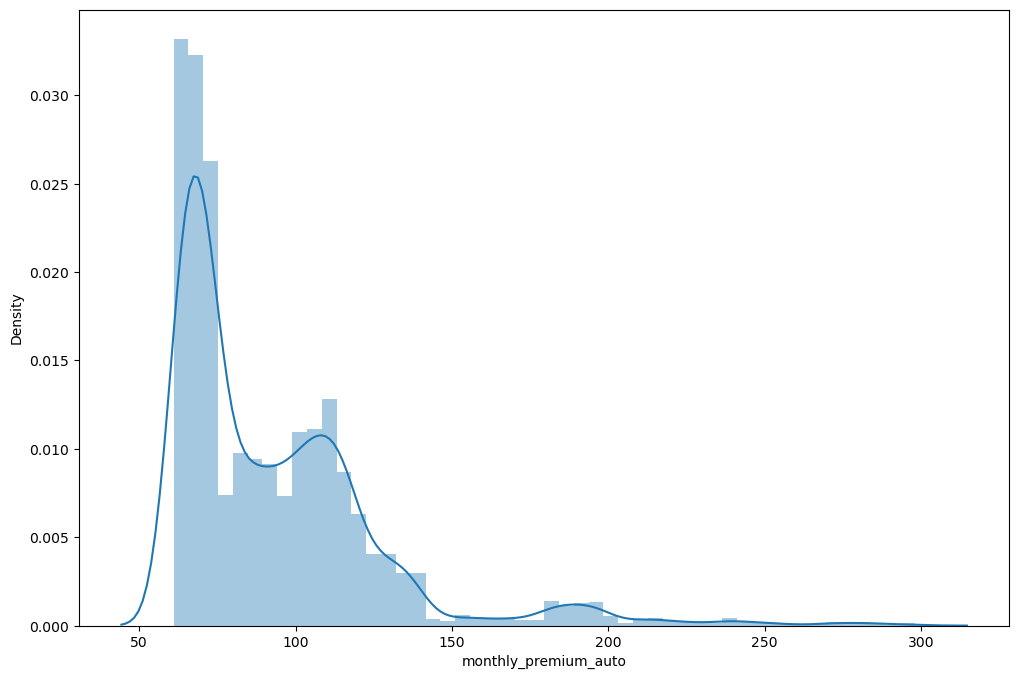

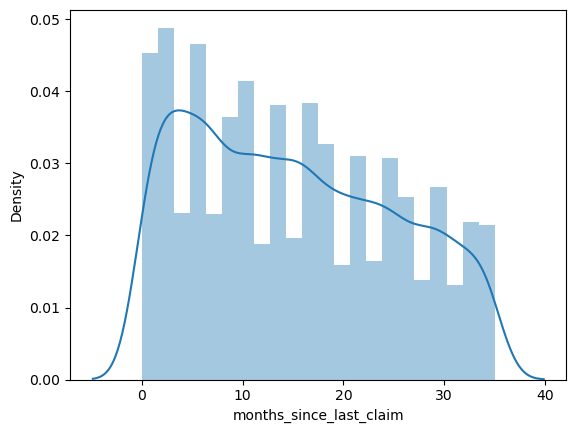

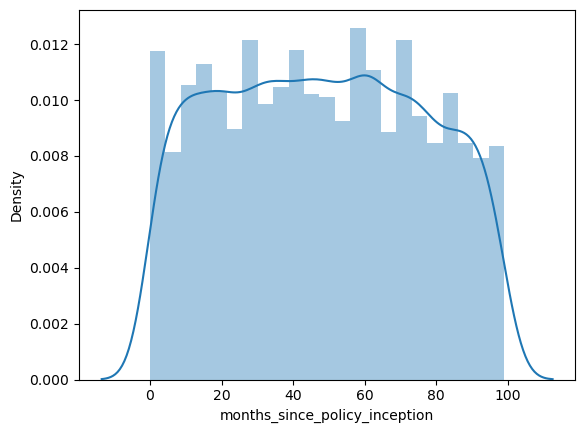

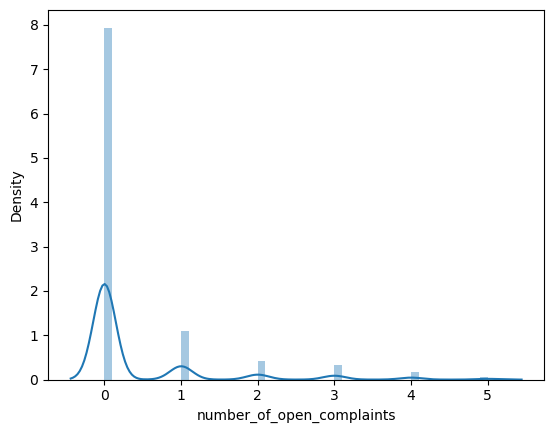

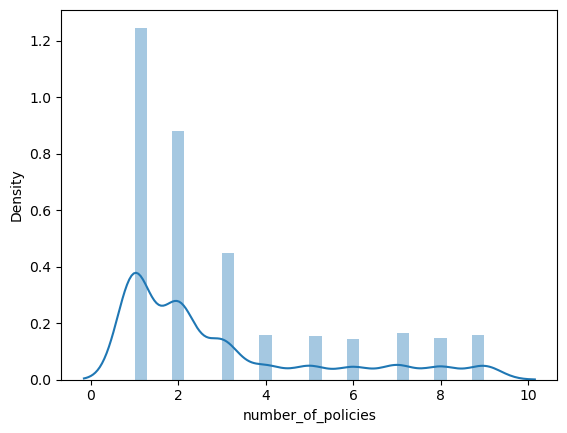

In [17]:
plt.figure(figsize = (12,8))
for column in discrete_df:
    sns.distplot(nums[column])
    plt.show()


9. we can can from the plots that we have outliers in some columns, and some distribution are not well distributed e.g. Income, total claim amount number of complaints.

Monthly premium auto has the outliers

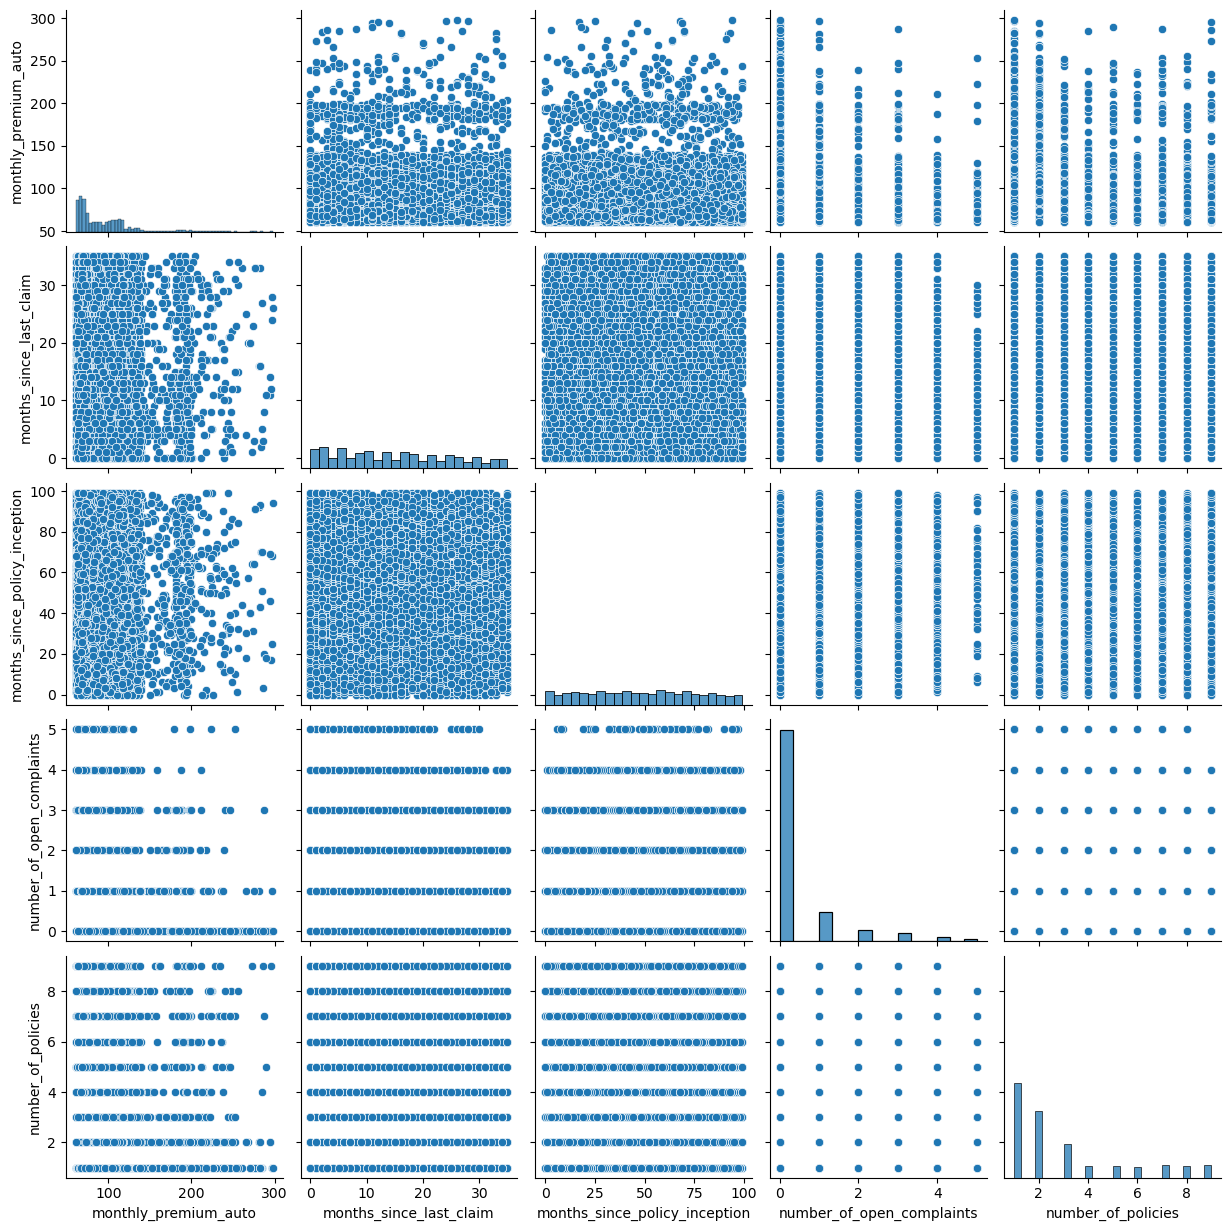

In [18]:
sns.pairplot(discrete_df)

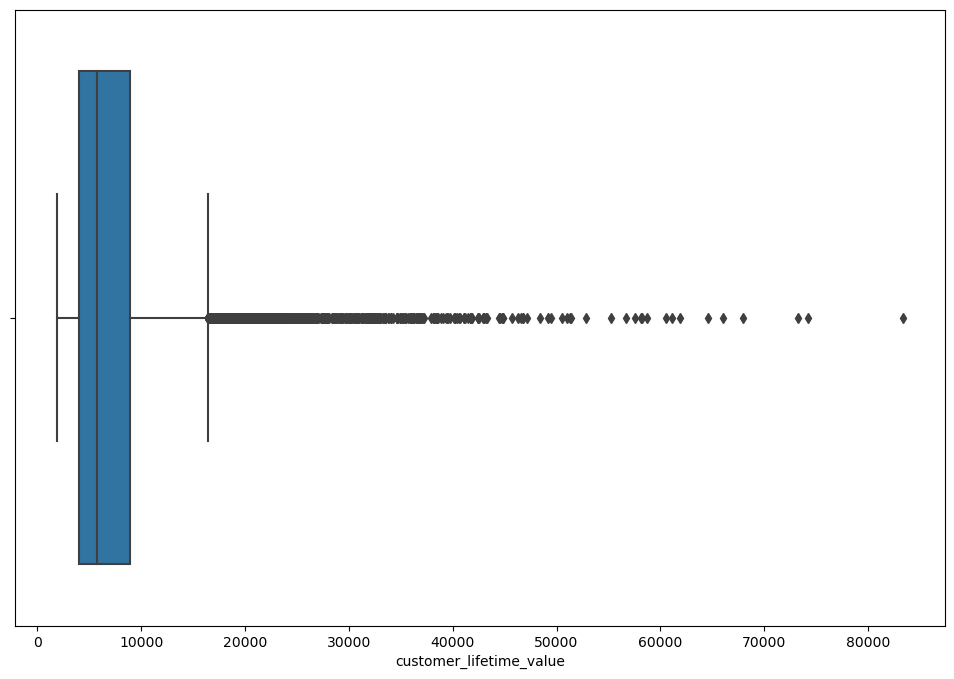

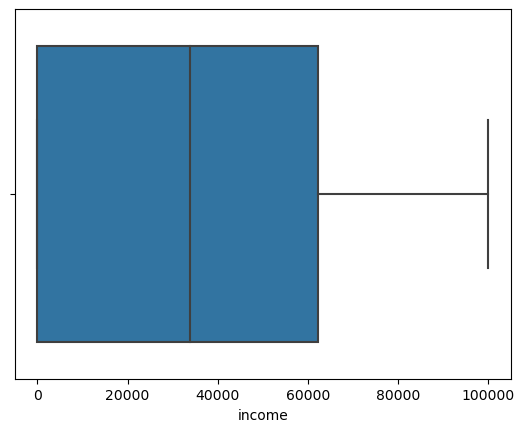

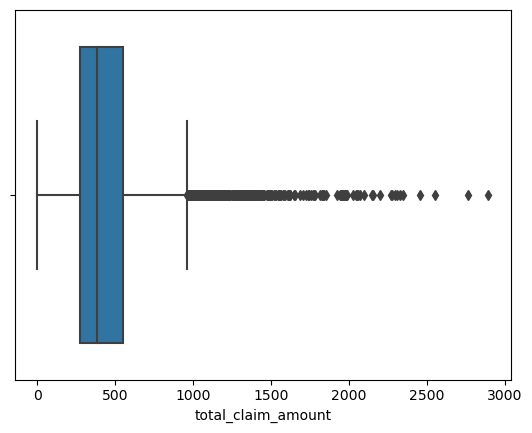

In [19]:

plt.figure(figsize = (12,8))
for column in continuous_df:
    sns.boxplot(nums[column])
    plt.show()

checking for outliers in the continuous variables

In [20]:
def find_outlier(col):
    q1, q3 = np.percentile(sorted(col), [25, 75])
    iqr = q3 - q1
   
    lower = q1 - (1.5 * iqr)
    whisker = q3 + (1.5 * iqr)
    outliers = [x for x in col if lower or x >= whisker]
    return outliers

tca_outliers = find_outlier(nums['total_claim_amount'])
mpa_outliers = find_outlier(nums['monthly_premium_auto'])



In [21]:
tca_outliers
mpa_outliers

pd.DataFrame(data = tca_outliers)

,0
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879
...,...
9129,198.234764
9130,379.200000
9131,790.784983
9132,691.200000


In [22]:

nums.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

we have no Nan values

# LAB random distribution variable

Get the numerical variables from our dataset.

Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [23]:
nums

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


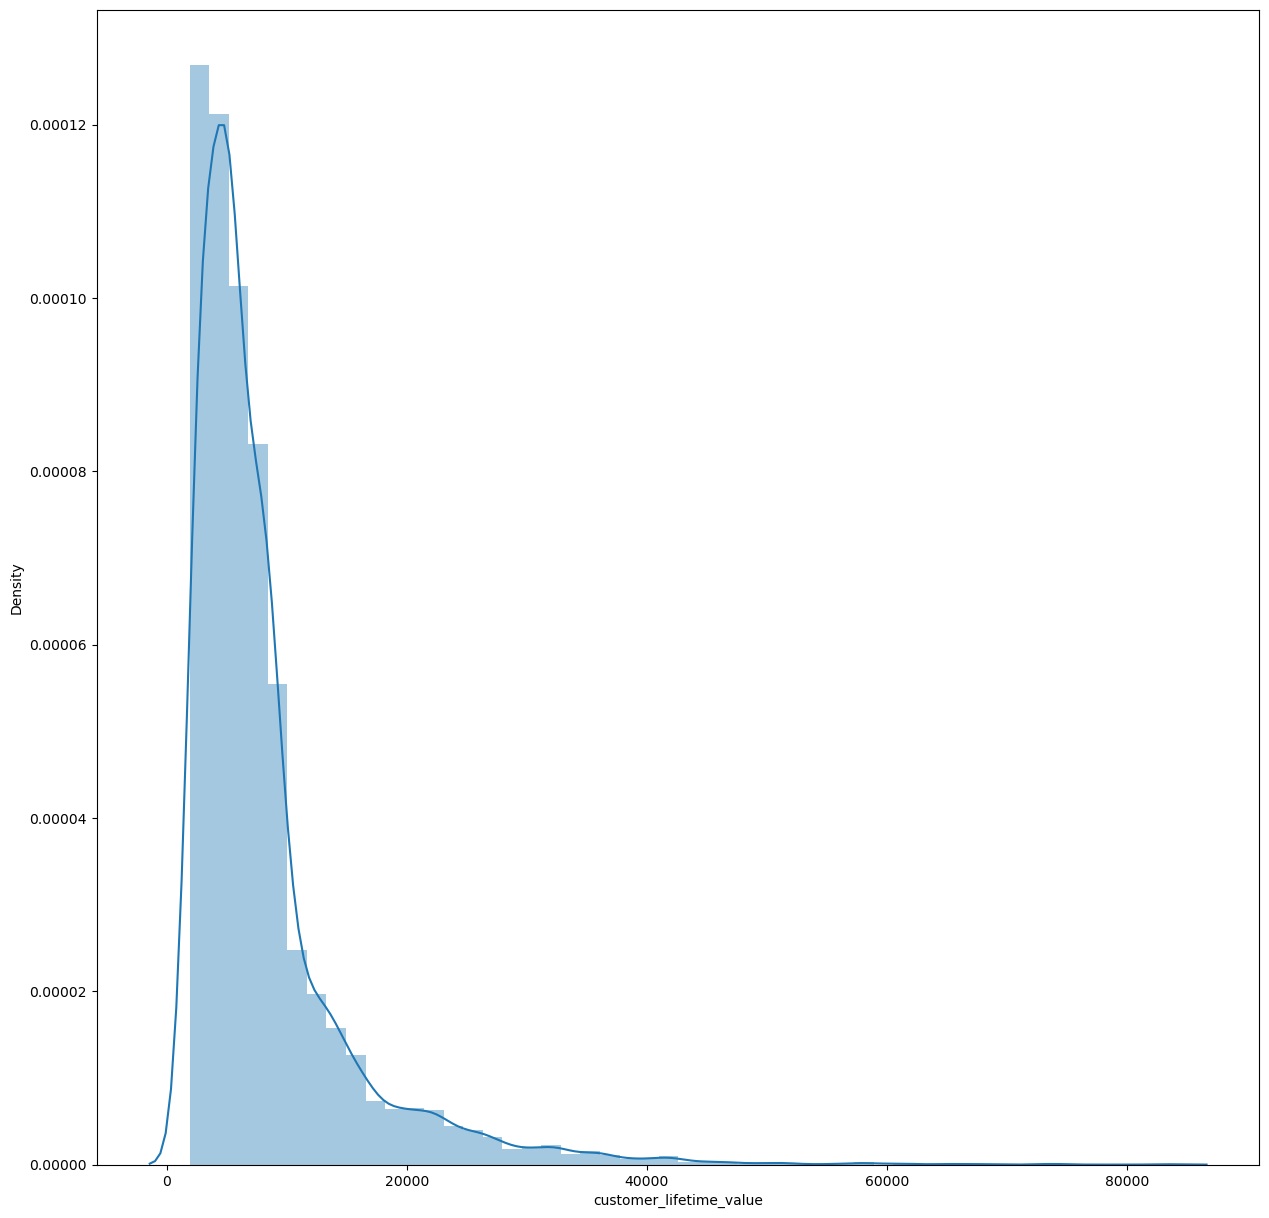

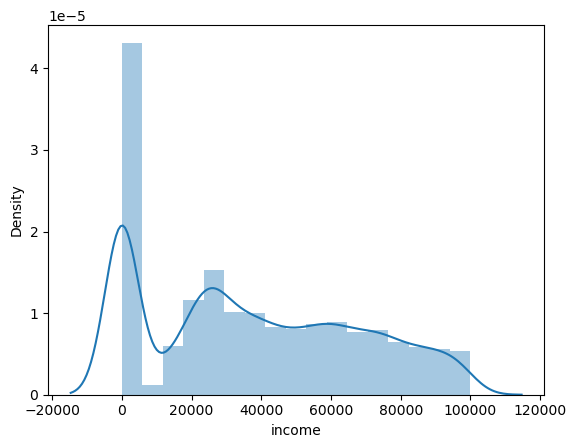

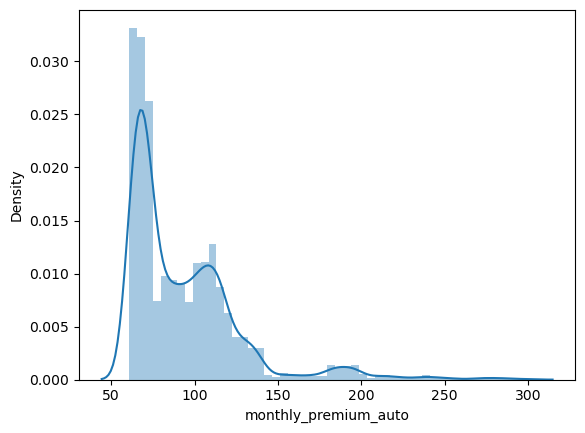

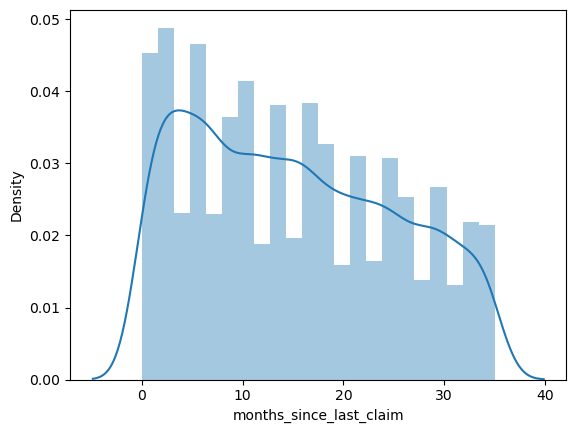

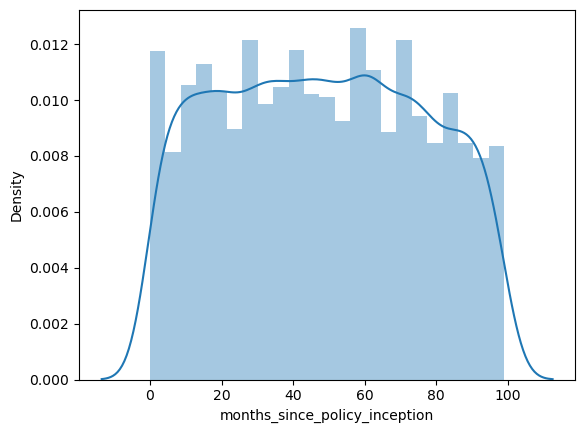

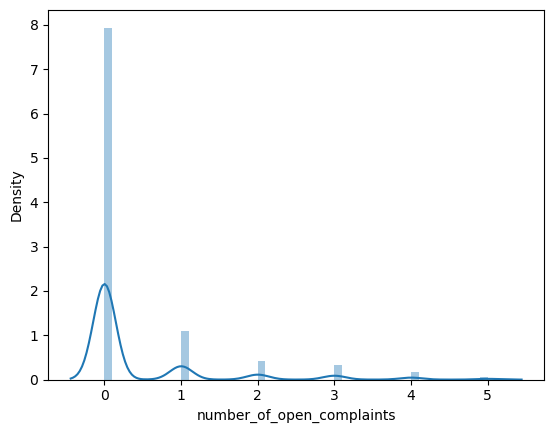

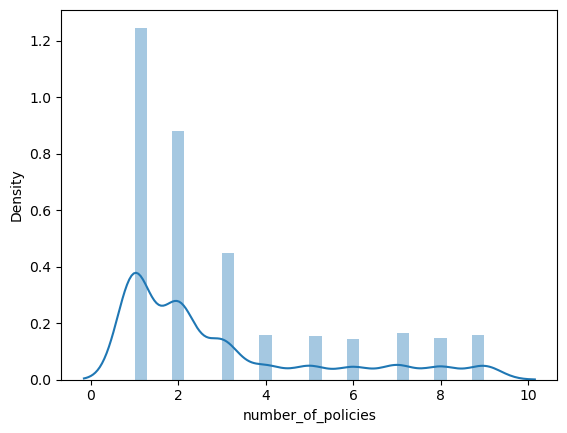

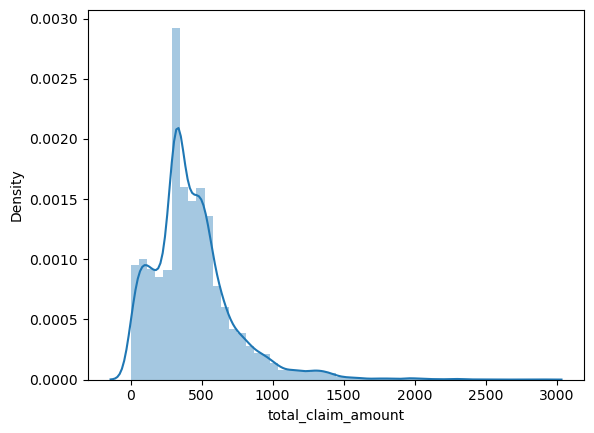

In [26]:
plt.figure(figsize = (15,15))
for column in nums:
    sns.distplot(nums[column], kde= True)
    plt.show()

from the plots above, we can infer some statements.

- the discrete numericals : those variables will follow a binomial (or Poisson) distribution 
    * number of policies  ==> poisson distribution
    * number of open complaints  ==> poisson distribution
    * months since policy inception  ==> binomial distribution
    * monthly premium auto  ==> poisson distribution
    * months since last claim  ==> binomial distribution


- the continuous numericals : those variables will follow a normal distribution
    * income
    * total_claim_amount
    * customer_lifetime_value

they all fit the theoritical distributions

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [45]:
# def dist_plots(df):
#     for column in df.columns:
#         sns.distplot(x=column, data=df, kde=True)
#         plt.show()
#     return


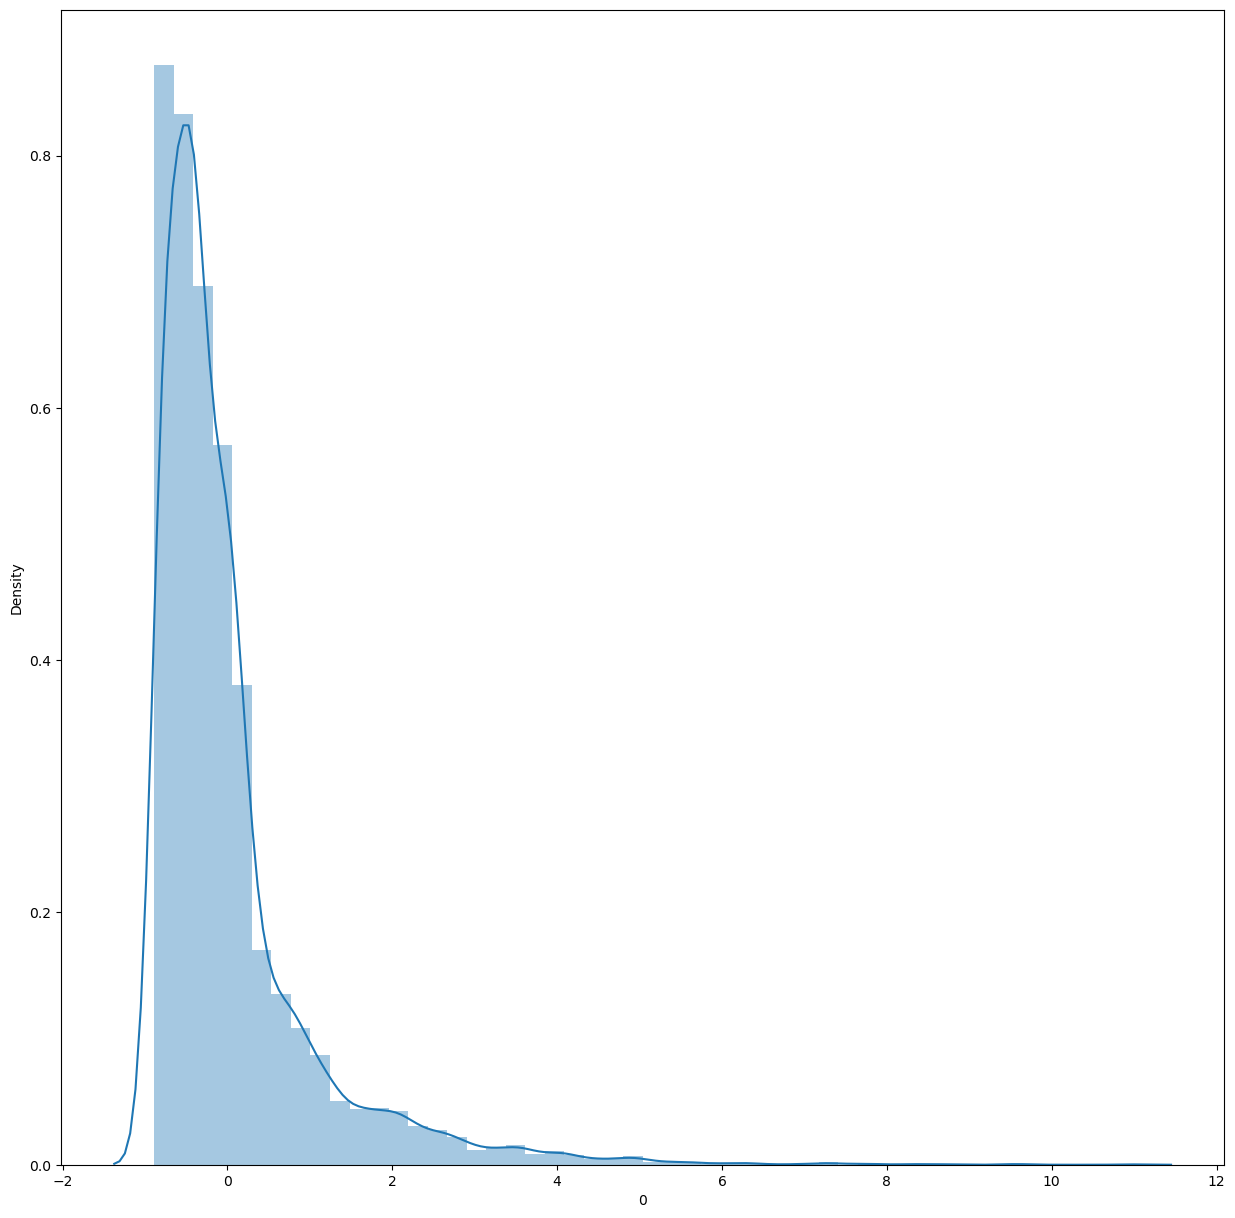

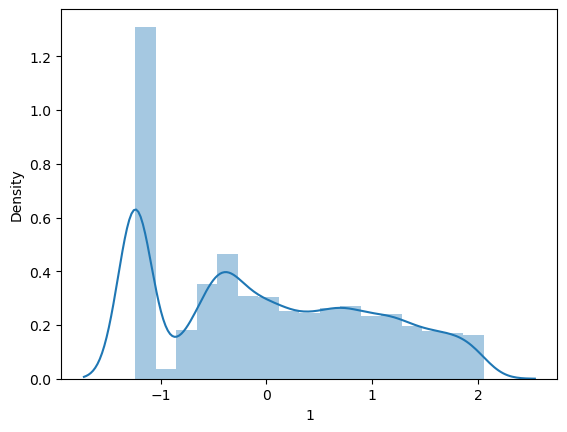

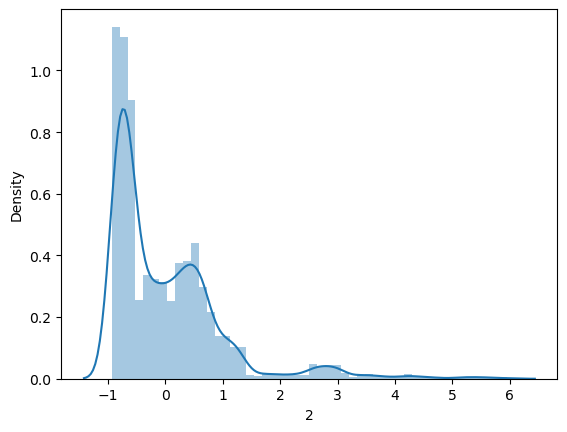

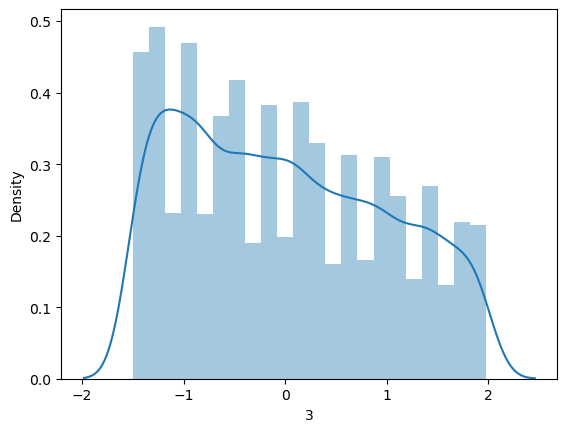

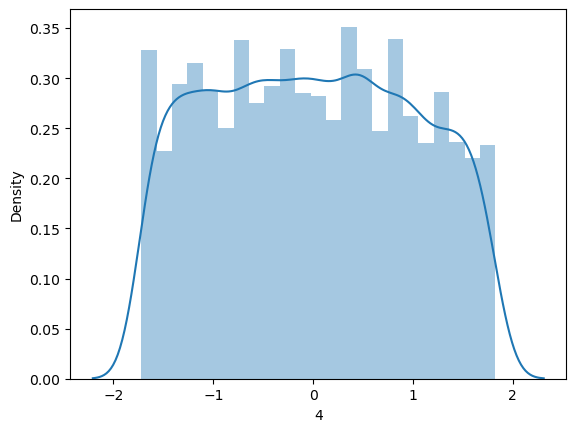

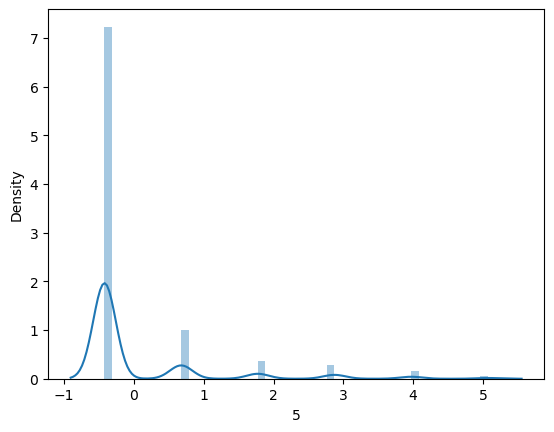

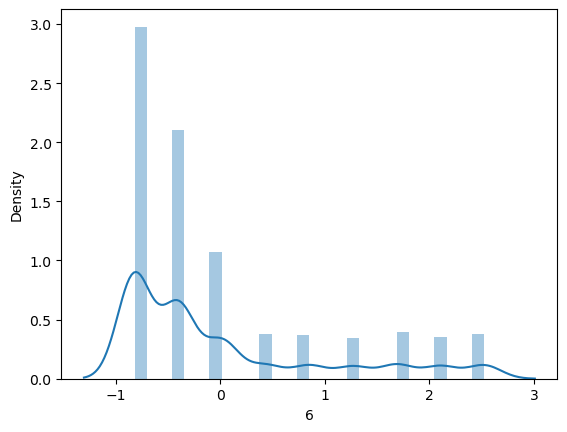

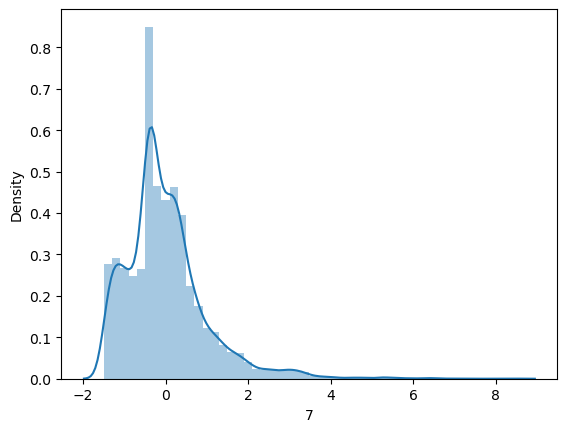

In [47]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(nums)
nums_stand = transformer.transform(nums)
nums_stand_df = pd.DataFrame(nums_stand)

plt.figure(figsize = (15,15))
for column in nums_stand_df:
    sns.distplot(nums_stand_df[column], kde= True)
    plt.show()



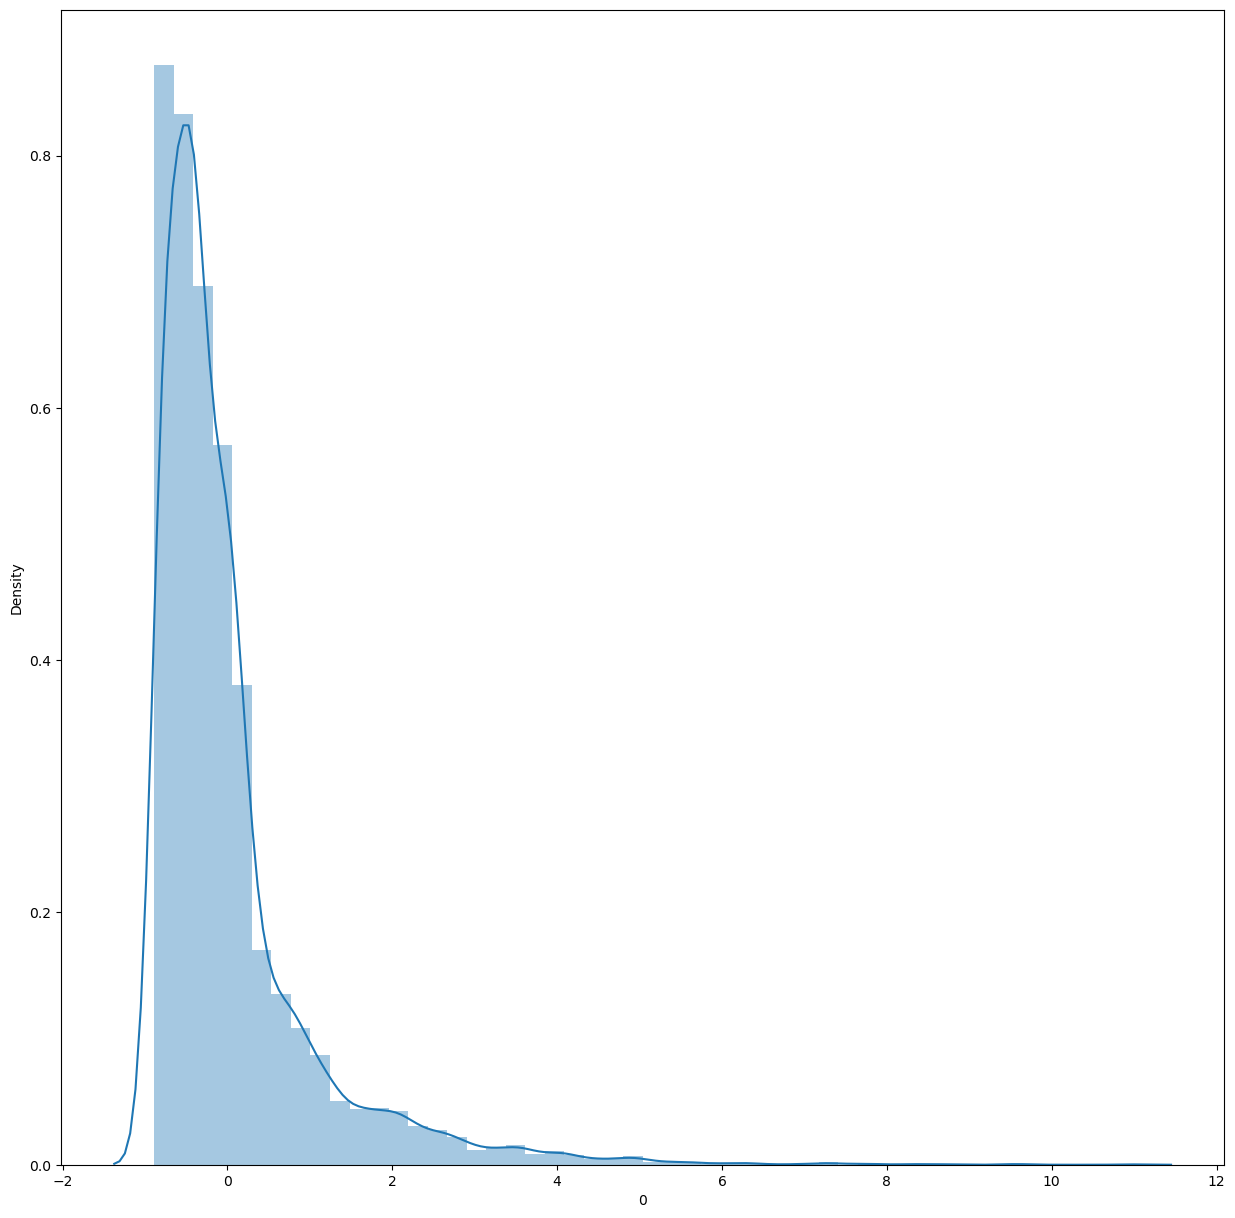

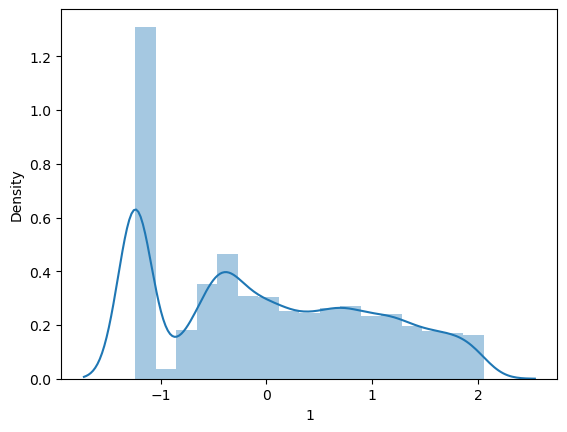

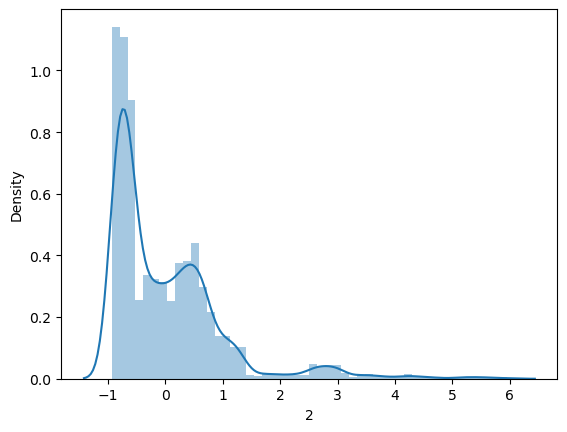

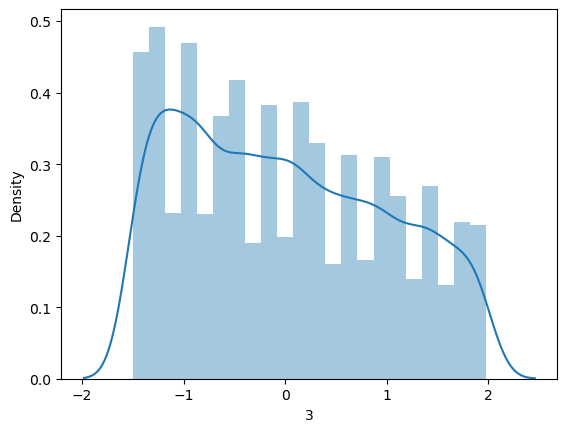

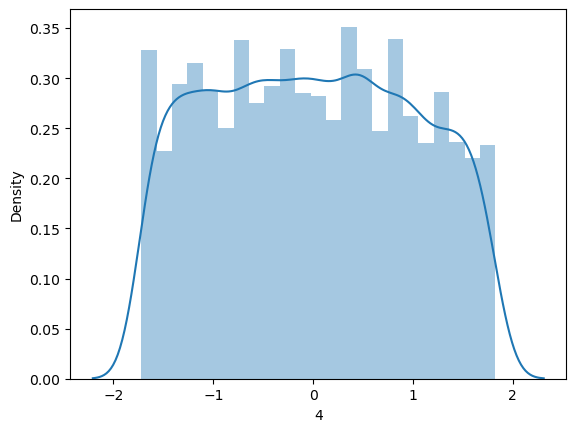

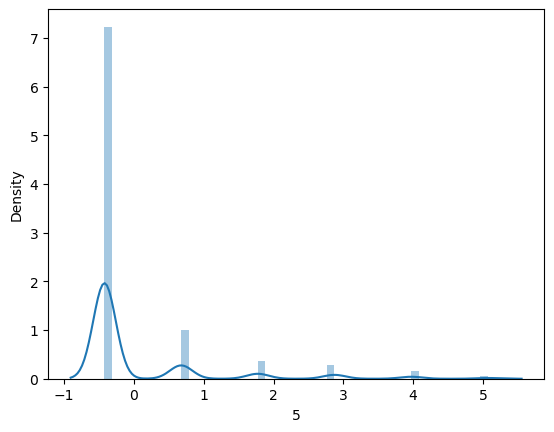

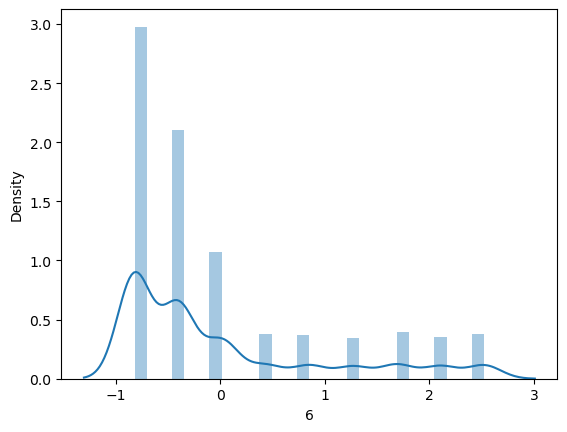

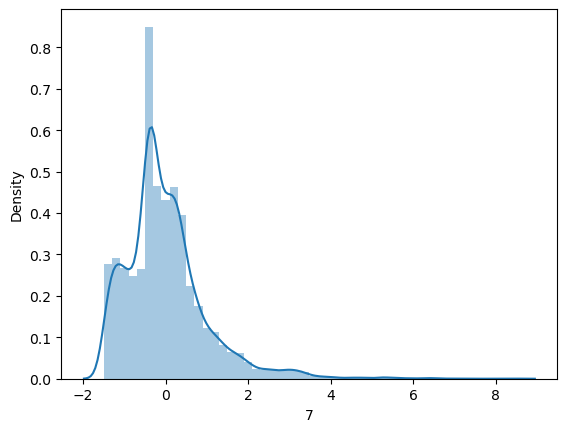

In [49]:
from sklearn.preprocessing import MinMaxScaler

transformer2 = MinMaxScaler().fit(nums)
nums_minmax = transformer.transform(nums)
nums_minmax_df = pd.DataFrame(nums_minmax)

plt.figure(figsize = (15,15))
for column in nums_minmax_df:
    sns.distplot(nums_minmax_df[column], kde= True)
    plt.show()

In [27]:
X = nums.drop(['total_claim_amount'], axis = 1)
y = nums['total_claim_amount']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# standardize scaler 

In [29]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train)
X_train_standardized = transformer.transform(X_train)
X_test_standardized = transformer.transform(X_test)

# minmax scaler 

In [40]:
from sklearn.preprocessing import MinMaxScaler

transformer2 = MinMaxScaler().fit(X_train)
X_train_minmax = transformer.transform(X_train)
X_test_minmax = transformer.transform(X_test)

# log transform 

In [52]:
X_train_log = np.log(X_train)
X_test_log = np.log(X_test)

X_train_log

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
7706,8.091063,10.158905,4.406719,2.302585,4.234107,-inf,0.000000
779,9.334161,11.280615,4.553877,3.332205,4.110874,1.098612,0.693147
8189,8.744241,9.522374,4.442651,3.367296,3.610918,-inf,1.098612
1942,8.365716,11.102413,4.672829,-inf,4.304065,-inf,0.000000
459,9.221357,9.664723,4.499810,3.295837,3.610918,-inf,0.693147
...,...,...,...,...,...,...,...
350,8.957071,10.078575,4.663439,2.890372,4.343805,0.693147,1.098612
79,10.971066,11.023878,5.225747,-inf,3.401197,0.000000,0.693147
8039,8.626526,9.314430,4.290459,3.258097,3.912023,-inf,1.386294
6936,8.314515,10.052166,4.672829,3.433987,4.094345,-inf,0.000000


# Linear regression model testing

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR = LinearRegression().fit(X_train,y_train)

In [38]:
predictions = LR.predict(X_train)
print('my r2 score train is:', r2_score(y_train, predictions))

predictions_test = LR.predict(X_test)
print('my r2 score test is:', r2_score(y_test, predictions_test))

my r2 score train is: 0.5288821376636371
my r2 score test is: 0.4728646269254414


# KNN regression model testing


In [36]:

from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)


KNeighborsRegressor()

In [37]:
score_test = KNN.score(X_test, y_test)
print('my score test is:', score_test)
score_train = KNN.score(X_train, y_train)
print('my score train is:', score_train)


my score test is: 0.21537116687562485
my score train is: 0.5232388584806118
